# Creating a GeoDataFrame from a DataFrame with coordinates

In [1]:
#memasukan modul yang digunakan 
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
#membuat dataFrame
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [3]:
#membuat kolom data baru yaitu 'Coordinates' yang isinya adalah gabungan nilai lat dan lon
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))

In [4]:
#menampilkan hasilnya
df.head()

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,"(-58.66, -34.58)"
1,Brasilia,Brazil,-15.78,-47.91,"(-47.91, -15.78)"
2,Santiago,Chile,-33.45,-70.66,"(-70.66, -33.45)"
3,Bogota,Colombia,4.60,-74.08,"(-74.08, 4.6)"
4,Caracas,Venezuela,10.48,-66.86,"(-66.86, 10.48)"


In [6]:
#membuat data Coordinates menjadi data point 
df['Coordinates'] = df['Coordinates'].apply(Point)
df.head()

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


In [8]:
#membentuknya menjadi dataFrame
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
gdf.head()

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


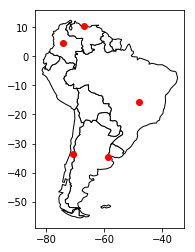

In [9]:
#memvisualisasikan data
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

## From WKT format

In [10]:
#membuat dataFrame
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Coordinates': ['POINT(-34.58 -58.66)', 'POINT(-15.78 -47.91)',
                     'POINT(-33.45 -70.66)', 'POINT(4.60 -74.08)',
                     'POINT(10.48 -66.86)']})

In [11]:
#menampilkan hasilnya
df.head()

,City,Country,Coordinates
0,Buenos Aires,Argentina,POINT(-34.58 -58.66)
1,Brasilia,Brazil,POINT(-15.78 -47.91)
2,Santiago,Chile,POINT(-33.45 -70.66)
3,Bogota,Colombia,POINT(4.60 -74.08)
4,Caracas,Venezuela,POINT(10.48 -66.86)


In [12]:
#membuat kolom baru yaitu 'Coordinates' dengan cara wkt
from shapely import wkt

df['Coordinates'] = df['Coordinates'].apply(wkt.loads)
df.head()

,City,Country,Coordinates
0,Buenos Aires,Argentina,POINT (-34.58 -58.66)
1,Brasilia,Brazil,POINT (-15.78 -47.91)
2,Santiago,Chile,POINT (-33.45 -70.66)
3,Bogota,Colombia,POINT (4.6 -74.08)
4,Caracas,Venezuela,POINT (10.48 -66.86)


In [13]:
#membentuknya menjadi dataFrame
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
gdf.head()

,City,Country,Coordinates
0,Buenos Aires,Argentina,POINT (-34.58 -58.66)
1,Brasilia,Brazil,POINT (-15.78 -47.91)
2,Santiago,Chile,POINT (-33.45 -70.66)
3,Bogota,Colombia,POINT (4.6 -74.08)
4,Caracas,Venezuela,POINT (10.48 -66.86)


## Plotting with CartoPy and GeoPandas

In [15]:
#memasukan modul yang digunakan 
# sphinx_gallery_thumbnail_number = 7
from cartopy import crs as ccrs

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)

# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

In [17]:
#menampilkan data 
df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_pp
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.000784
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0.008618
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0.005993
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0.038408
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0.014027


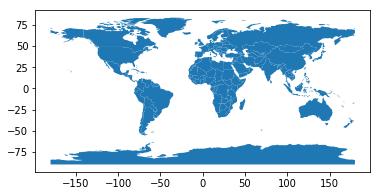

In [16]:
#memvisualisasikan data 
df.plot()

## Plotting with CartoPy

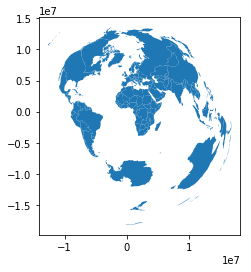

In [18]:
# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot()

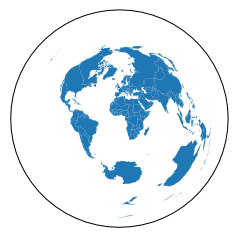

In [19]:
fig, ax = plt.subplots(subplot_kw={'projection': crs})
ax.add_geometries(df_ae['geometry'], crs=crs)

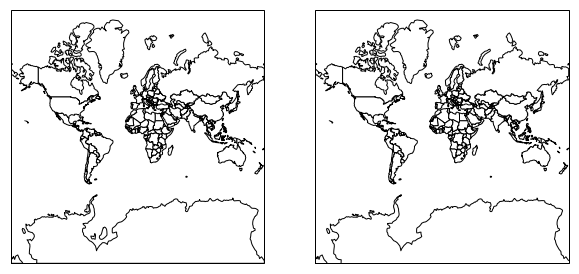

In [20]:
crs_epsg = ccrs.epsg('3857')
df_epsg = df.to_crs(epsg='3857')

# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': crs_epsg},
                        figsize=(10, 5))
# Make the CartoPy plot
axs[0].add_geometries(df_epsg['geometry'], crs=crs_epsg,
                      facecolor='white', edgecolor='black')
# Make the GeoPandas plot
df_epsg.plot(ax=axs[1], color='white', edgecolor='black')

## CartoPy to GeoPandas

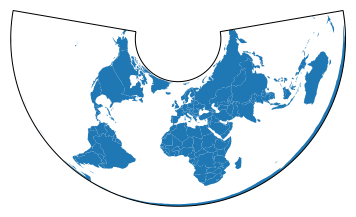

In [21]:
crs_new = ccrs.AlbersEqualArea()
new_geometries = [crs_new.project_geometry(ii, src_crs=crs)
                  for ii in df_ae['geometry'].values]

fig, ax = plt.subplots(subplot_kw={'projection': crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

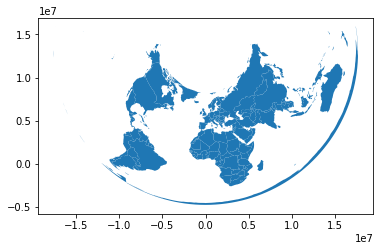

In [22]:
df_aea = geopandas.GeoDataFrame(df['gdp_pp'], geometry=new_geometries,
                                crs=crs_new.proj4_init)
df_aea.plot()

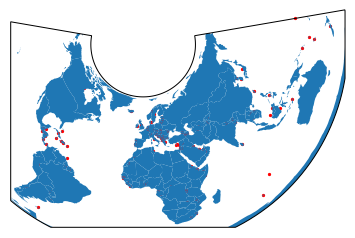

In [23]:
# Generate a CartoPy figure and add the countries to it
fig, ax = plt.subplots(subplot_kw={'projection': crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

# Calculate centroids and plot
df_aea_centroids = df_aea.geometry.centroid
df_aea_centroids.plot(ax=ax, markersize=5, color='r')

plt.show()

In [25]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


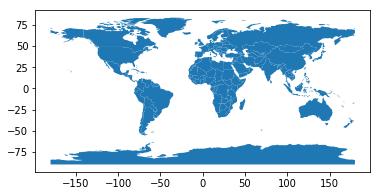

In [26]:
world.plot()

In [27]:
world.geometry.name

'geometry'

In [28]:
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')

In [29]:
world.geometry.name

'borders'

In [30]:
world['centroid_column'] = world.centroid

In [31]:
world = world.set_geometry('centroid_column')

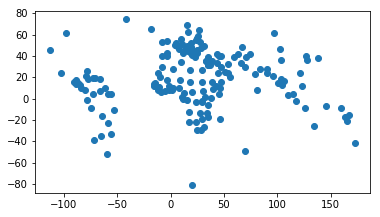

In [32]:
world.plot()

## Mapping Tools

In [36]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [38]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [37]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [39]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


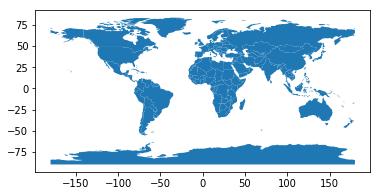

In [40]:
# Basic plot, random colors
world.plot()

## Choropleth Maps

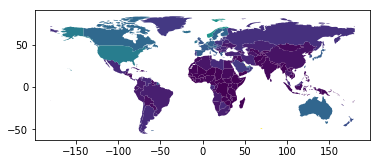

In [41]:
# Plot by GDP per capta
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap');

## Choosing colors

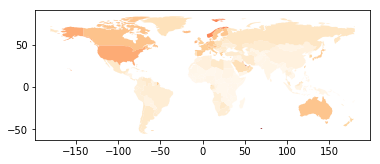

In [42]:
world.plot(column='gdp_per_cap', cmap='OrRd')

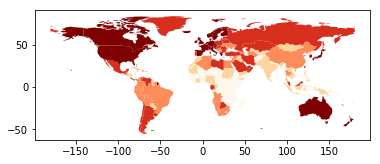

In [43]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

## Maps with Layers

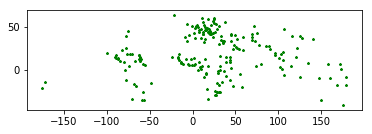

In [44]:
# Look at capitals
# Note use of standard `pyplot` line style options
cities.plot(marker='*', color='green', markersize=5)

# Check crs
cities = cities.to_crs(world.crs)

# Now we can overlay over country outlines
# And yes, there are lots of island capitals
# apparently in the middle of the ocean!

### Method 1

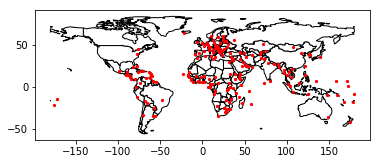

In [47]:
base = world.plot(color='white', edgecolor='black')
cities.plot(ax=base, marker='o', color='red', markersize=5)

### Method 2: Using matplotlib objects

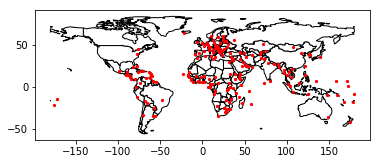

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
cities.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show();

                                ##Semoga Bermanfaat
                                ##@Raspiani_